get 방식 <br>
post 방식 <br>

### 기온 예측 <br>
30일을 입력값으로 사용 다음날 예측 <br>
설명변수 : 1일 ~30일까지의 날씨 <br>
목표변수 : 31일의 날씨

In [289]:
# 필요 라이브러리 임포트

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

temp_data = pd.read_csv("../../data/csv/temp_mean_gwangju.csv", index_col=0)
temp_data.head()

,1960_1_mean,1960_2_mean,1960_3_mean,1960_4_mean,1960_5_mean,1960_6_mean,1960_7_mean,1960_8_mean,1960_9_mean,1960_10_mean,...,2020_11_mean,2020_12_mean,2021_1_mean,2021_2_mean,2021_3_mean,2021_4_mean,2021_5_mean,2021_6_mean,2021_7_mean,2021_8_mean
0,2.7,1.7,7.9,3.6,13.5,17.3,24.0,27.1,24.9,18.8,...,12.4,4.3,-0.6,8.3,11.5,16.7,10.6,23.5,25.7,28.2
1,2.6,0.9,8.5,4.2,17.0,19.0,24.1,27.9,24.8,17.0,...,13.1,5.3,-0.3,-1.0,4.7,18.7,12.3,23.4,26.1,26.9
2,6.4,2.5,6.4,7.4,21.5,19.2,24.5,28.6,25.3,15.2,...,8.8,4.3,-0.6,0.3,6.2,16.8,15.6,19.8,23.7,27.0
3,10.9,0.8,8.4,8.2,17.6,18.0,25.4,28.8,22.2,16.6,...,7.9,3.3,1.2,1.6,6.9,11.0,17.4,20.0,23.1,28.6
4,-0.2,1.2,8.7,6.0,15.6,19.9,25.2,26.2,21.6,16.3,...,10.0,4.5,-0.2,2.8,10.7,12.4,15.0,20.9,21.9,28.8


In [290]:
# EDA 진행
temp_data.iloc[0] # 첫번째 row 데이터

1960_1_mean     2.7
1960_2_mean     1.7
1960_3_mean     7.9
1960_4_mean     3.6
1960_5_mean    13.5
               ... 
2021_4_mean    16.7
2021_5_mean    10.6
2021_6_mean    23.5
2021_7_mean    25.7
2021_8_mean    28.2
Name: 0, Length: 740, dtype: float64

In [291]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Columns: 740 entries, 1960_1_mean to 2021_8_mean
dtypes: float64(740)
memory usage: 179.5 KB


In [292]:
temp_data.describe()

,1960_1_mean,1960_2_mean,1960_3_mean,1960_4_mean,1960_5_mean,1960_6_mean,1960_7_mean,1960_8_mean,1960_9_mean,1960_10_mean,...,2020_11_mean,2020_12_mean,2021_1_mean,2021_2_mean,2021_3_mean,2021_4_mean,2021_5_mean,2021_6_mean,2021_7_mean,2021_8_mean
count,31.000000,29.000000,31.000000,30.000000,31.000000,30.000000,31.000000,31.000000,17.000000,31.000000,...,30.000000,31.000000,31.000000,28.000000,31.000000,30.000000,31.000000,30.000000,31.000000,31.000000
mean,0.132258,3.203448,8.464516,10.903333,16.564516,21.676667,26.380645,26.622581,21.176471,15.503226,...,10.540000,2.658065,1.438710,5.142857,10.635484,14.896667,18.380645,23.290000,27.041935,25.829032
std,4.020894,2.840835,3.600236,3.901325,2.371715,2.212610,1.467746,1.610116,2.464632,2.283927,...,3.707923,3.212245,5.317059,4.566742,2.664901,3.158730,3.096925,1.498816,2.018048,1.545573
min,-8.000000,-1.300000,0.700000,3.600000,12.100000,17.300000,23.300000,23.600000,17.600000,10.500000,...,4.400000,-5.100000,-9.900000,-4.500000,4.700000,9.400000,10.600000,19.800000,21.900000,22.700000
25%,-2.250000,0.900000,6.400000,8.300000,14.700000,20.525000,25.300000,25.150000,19.300000,13.800000,...,8.225000,1.050000,-1.400000,1.675000,8.950000,12.500000,16.350000,22.850000,25.850000,24.950000
50%,-0.200000,2.500000,8.200000,10.750000,16.900000,21.500000,26.800000,27.100000,20.200000,15.800000,...,10.000000,3.500000,0.600000,4.350000,10.600000,14.400000,18.100000,23.400000,27.800000,25.700000
75%,2.600000,5.500000,10.900000,13.450000,18.000000,23.175000,27.300000,28.050000,23.400000,17.000000,...,13.000000,5.100000,6.350000,9.325000,12.350000,17.250000,21.000000,24.075000,28.700000,26.750000
max,10.900000,9.700000,16.000000,18.100000,21.500000,25.600000,28.600000,28.800000,25.300000,19.000000,...,19.700000,7.000000,9.400000,13.000000,15.300000,21.300000,23.700000,26.000000,29.100000,28.800000


<AxesSubplot: >

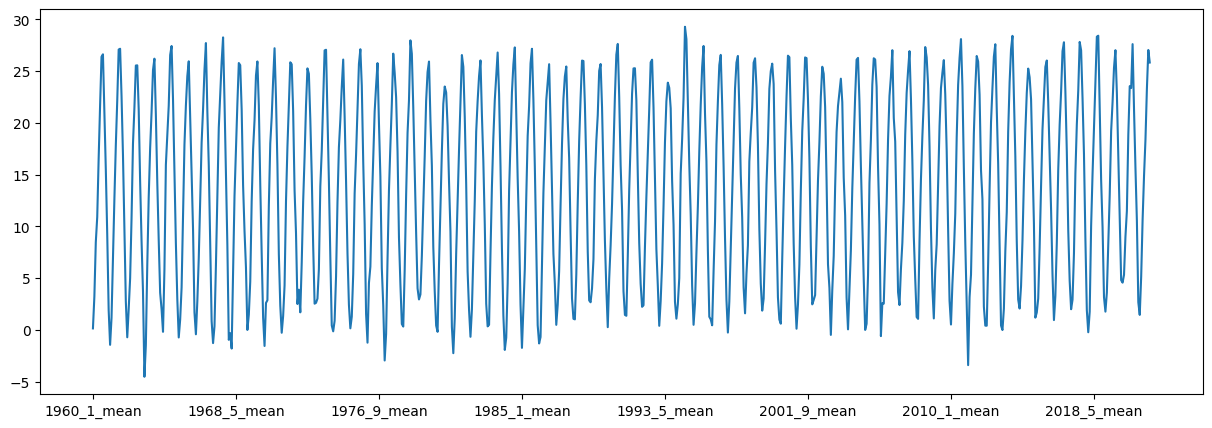

In [293]:
plt.figure(figsize=(15,5))
temp_data.mean().plot()

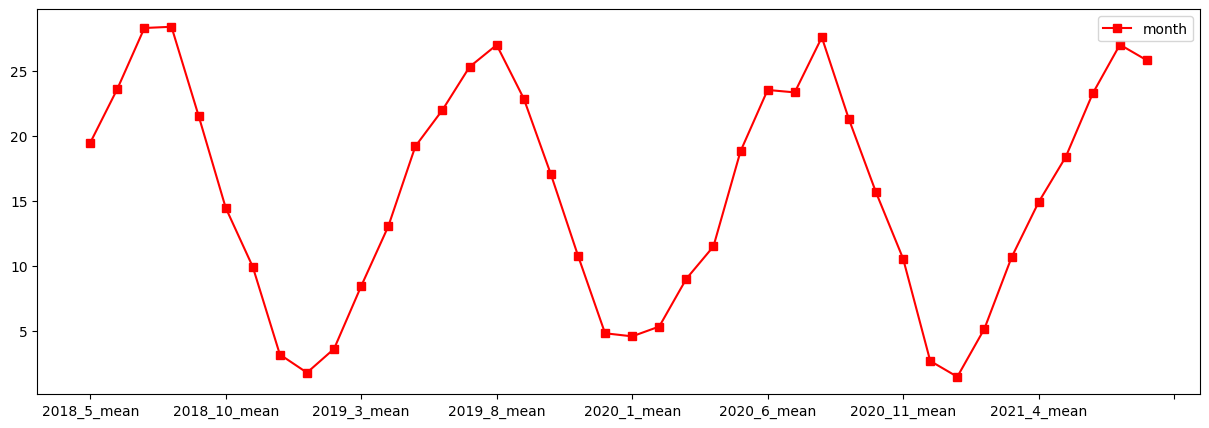

In [294]:
plt.figure(figsize=(15,5))
temp_data.mean()[700:].plot(marker="s", color="red", label="month")
plt.legend();

In [295]:
# transpose
# null 처리
# 입력기간과 예측 기간에 설정 ... 전처리

In [296]:
temp_include_nan = temp_data.values.T.flatten()
temp = temp_include_nan[~np.isnan(temp_include_nan)]

In [297]:
# 입력 기간과 예측 기간에 따른 데이터 전처리


# 입력 기간
steps = 30
# 예측 기간
forecast_terms = 15

x_train = np.array([temp[i:i+steps] for i in range(len(temp)-forecast_terms-steps)])
y_train = temp[steps:len(temp)-forecast_terms]

x_test = np.array([temp[-(steps+forecast_terms)+i:-forecast_terms+i]
	for i in range(forecast_terms)])
y_test = temp[-forecast_terms:]

In [298]:
# 딥러닝 설계
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Shallow Neural Network
#입력노드 수
input_node = 30
#출력노드 수
output_node = 15

#모델
model_shallow = Sequential()
model_shallow.add(Dense(31, activation="relu", input_shape=(input_node,)))
model_shallow.add(Dense(output_node))
model_shallow.compile(loss='mae',
optimizer='adam')



In [299]:
model_shallow.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 31)                961       
                                                                 
 dense_33 (Dense)            (None, 15)                480       
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [300]:
shallow_history = model_shallow.fit(
    x_train, y_train,
    epochs=10,
    batch_size=100,
    validation_split=0.2,
)

Epoch 1/10
180/180 [==============================] - 1s 5ms/step - loss: 4.3200 - val_loss: 2.4368
Epoch 2/10
180/180 [==============================] - 1s 4ms/step - loss: 2.2016 - val_loss: 2.1003
Epoch 3/10
180/180 [==============================] - 1s 4ms/step - loss: 1.8981 - val_loss: 1.8562
Epoch 4/10
180/180 [==============================] - 1s 4ms/step - loss: 1.7758 - val_loss: 1.7727
Epoch 5/10
180/180 [==============================] - 1s 4ms/step - loss: 1.6949 - val_loss: 1.7133
Epoch 6/10
180/180 [==============================] - 1s 4ms/step - loss: 1.6481 - val_loss: 1.6654
Epoch 7/10
180/180 [==============================] - 1s 4ms/step - loss: 1.6079 - val_loss: 1.6429
Epoch 8/10
180/180 [==============================] - 1s 4ms/step - loss: 1.5767 - val_loss: 1.6150
Epoch 9/10
180/180 [==============================] - 1s 4ms/step - loss: 1.5589 - val_loss: 1.5767
Epoch 10/10
180/180 [==============================] - 1s 4ms/step - loss: 1.5490 - val_loss: 1.5648

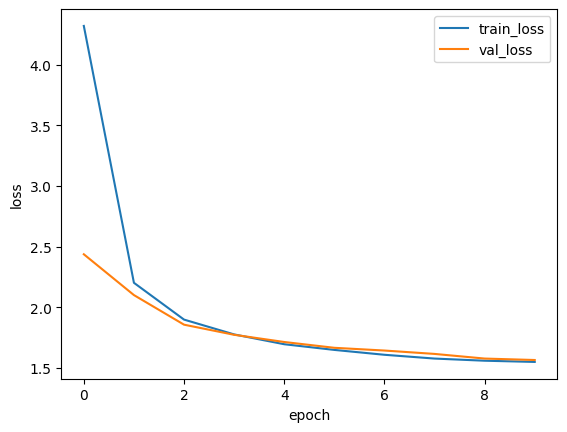

In [301]:
plt.plot(shallow_history.history["loss"], label="train_loss")
plt.plot(shallow_history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend();

In [302]:
pred = model_shallow.predict(x_test)

1/1 [==============================] - 0s 52ms/step


In [303]:
pred.shape

(15, 15)

In [304]:
y_test.shape

(15,)

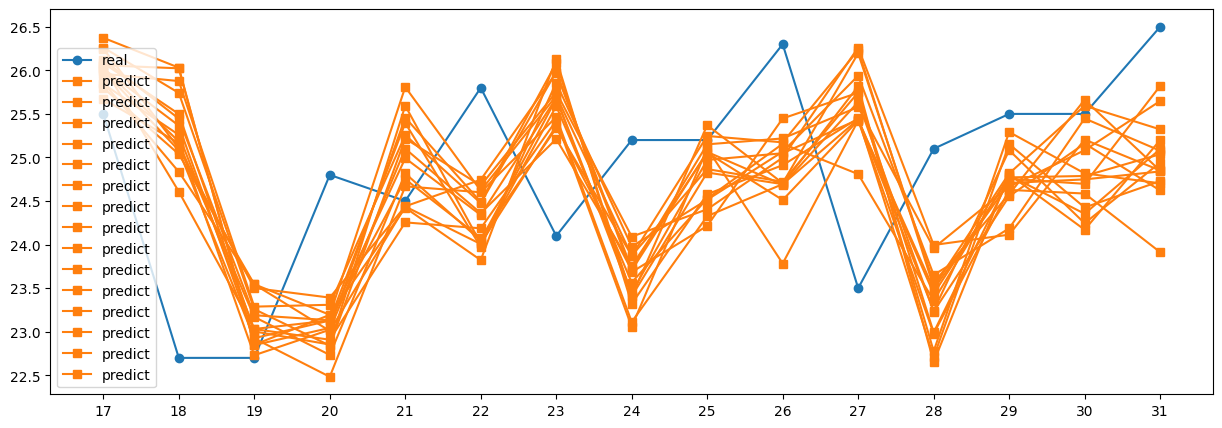

In [305]:
plt.figure(figsize=(15,5))
plt.plot(y_test, c="C0", marker="o", label="real")
plt.plot(pred, c="C1", marker="s", label="predict")
plt.xticks(range(15), labels=list(range(17,32)))
plt.legend();

In [306]:
(y_test-pred).mean()

0.2404930114746095